In [3]:
import json
import os
import sys

import numpy as np
import torch
from torch.utils.data import DataLoader

import yousef_model as model

# currentdir = os.path.dirname(os.path.abspath(''))
currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
grandparentdir = os.path.dirname(parentdir)
sys.path.append(grandparentdir)

from res.process_data.dataset import tensor_dataset
from res.fnn.training import training_bce
import res.process_data.process_output as pro_out
import res.fnn.functions as func

In [4]:
gen = model.GeneratorNet()
disc = model.DiscriminatorNet()

In [7]:
# load trained model
gen_checkpoint = torch.load('model/self_avoid/0_5_1/yousef_model_gan_1000.pth.tar')
# disc_checkpoint = torch.load('models/model_disc_1000.pth.tar')
gen.state_dict(gen_checkpoint['gen_state_dict'])
# gen.state_dict(disc_checkpoint['disc_state_dict'])
print('done')

done


In [14]:
noise = func.get_noise(10000, 8)
output = gen(noise).data.numpy()
output = output.reshape(140000)

<AxesSubplot:ylabel='Count'>

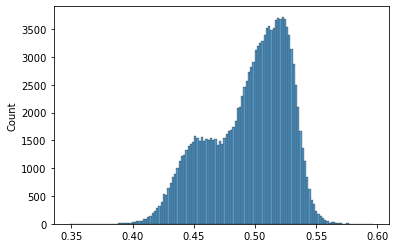

In [15]:
import seaborn as sns
sns.histplot(output)


In [13]:
np.shape(output)

(10000, 14)